# Proyek Analisis Data: Bike-sharing-dataset
- Nama: Muhammad Rizq Ramadhan
- Email: XXXXXXXXX
- Id Dicoding: XXXXXXX

## Menentukan Pertanyaan Bisnis

1. Apakah kondisi musim dan cuaca mempengaruhi jumlah user? 
2.  Apakah waktu kerja meningkatkan jumlah user? 
3. Pada jam berapa user bike sharing system paling sering dan paling sedikit digunakan? 

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## Data Wrangling

### Gathering Data

In [2]:
day = pd.read_csv('data/day.csv')

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour = pd.read_csv('data/hour.csv')

In [5]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Dataset characteristics

Berikut merupakan keterangan dari masing-masing kolom yang terdapat pada **day.csv** dan **hour.csv**
    
    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

Dataset **day.csv** dan **hour.csv** diambil dari Capital Bikeshare system di kota Washington D.C., USA 

1. **day.csv** merupakan dataset yang menampung bike sharing selama 731 hari
2. **hour.csv** merupakan dataset yang menampung bike sharing selama 17379 jam
3. **day** merupakan variable yang menampung dataset **day.csv**
4. **hour** merupakann variable yang menampung dataset **hour.csv**


Pada proses cleaning data nantinya saya akan memanipulasi beberapa kolom yang sebelumnya angka menjadi keterangan yang sesuai, sehingga dataset lebih mudah dipahami, dalam menjelaskan setiap tahapan analisis data dataset **day** dan **hour** memiliki karakteristik column yang hampir sama, sehingga **saya akan bergantian dalam melakukan analisis data**. 

### Assesing data

### DAY

In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### HOUR

In [7]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


1. Saya akan merubah nama column karena column tersebut disingkat-singkat
2. column instant berarti record index, pada dasarnya pandas sudah memiliki index tersendiri, sehingga tidak membutuhkan index lagi. Saya melakukan drop column karena tidak dibutuhkan
3. dteday bertype object, sehingga perlu merubahnya menjadi type datetime

-----------------------------------------------------------------

### DAY

In [8]:
day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### HOUR

In [9]:
hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


4. Berdasarkan dataset characteristic, column:
    - temp valuenya telah dibagi 41
    - atemp valuenya telah dibagi 50
    - hum valuenya telah dibagi 100
    - windspeed valuenya telah dibagi 67

5. Pada dataset **day** column `hum` memiliki minimal value 0.0000, sehingga dapat dikatakan **inaccurate data**

6. Pada dataset **hour** column `atemp`, `hum`, dan `windspeed` memiliki minimal value 0.0000, sehingga dapat dikatakan **inaccurate data**

pada nomer 5 dan 6, dikatakan **inaccurate data** karena itu bersifat **kondisi** sehingga tidak memungkinkan kondisi tersebut 0 

Kebanyakan value berbentuk numerik, akan tetapi mereka sebenernya kategori berdasarkan dataset characteristic sehingga saya tidak mengecek apakah data tersebut terdapat duplicate atau tidak
#### saya akan mengembalikan nilai aslinya dan membulatkannya sehingga lebih mudah dipahami

--------------------------------------------------------------

### Day

In [10]:
for column in day.columns:
    na_value = day[f"{column}"].isna().sum()
    print(f"day na value of {column}: {na_value}", )

day na value of instant: 0
day na value of dteday: 0
day na value of season: 0
day na value of yr: 0
day na value of mnth: 0
day na value of holiday: 0
day na value of weekday: 0
day na value of workingday: 0
day na value of weathersit: 0
day na value of temp: 0
day na value of atemp: 0
day na value of hum: 0
day na value of windspeed: 0
day na value of casual: 0
day na value of registered: 0
day na value of cnt: 0


### Hour

In [11]:
for column in hour.columns:
    na_value = hour[f"{column}"].isna().sum()
    print(f"hour na value of {column}: {na_value}", )

hour na value of instant: 0
hour na value of dteday: 0
hour na value of season: 0
hour na value of yr: 0
hour na value of mnth: 0
hour na value of hr: 0
hour na value of holiday: 0
hour na value of weekday: 0
hour na value of workingday: 0
hour na value of weathersit: 0
hour na value of temp: 0
hour na value of atemp: 0
hour na value of hum: 0
hour na value of windspeed: 0
hour na value of casual: 0
hour na value of registered: 0
hour na value of cnt: 0


kode ini memastikan apakah benar2 tidak ada missing value, dapat disimpulkan tidak ada value yang hilang

Melihat value yang kosong pada dataset day dan hour, dapat dilihat **tidak ada value yang kosong pada dataset ini**

----------------------------------------------

## Cleaning Data

### 1. Mengganti nama kolom

### Day

In [12]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
day.rename(columns={'dteday': 'date', 
                    'yr': 'year',
                    'mnth': 'month',
                    'weekday': 'week_day',
                    'workingday': 'working_day',
                    'weathersit': 'weather_sit',
                    'temp': 'temprature',
                    'atemp': 'feel_temprature',
                    'hum': 'humidity',
                    'windspeed': 'wind_speed',
                    'casual': 'casual_user',
                    'registered': 'registered_user',
                    'cnt': 'total_user'}, inplace=True)

In [14]:
day.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'week_day',
       'working_day', 'weather_sit', 'temprature', 'feel_temprature',
       'humidity', 'wind_speed', 'casual_user', 'registered_user',
       'total_user'],
      dtype='object')

### Hour

In [15]:
hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [16]:
hour.rename(columns={'dteday': 'date', 
                    'yr': 'year',
                    'mnth': 'month',
                    'hr': 'hour',
                    'weekday': 'week_day',
                    'workingday': 'working_day',
                    'weathersit': 'weather_sit',
                    'temp': 'temprature',
                    'atemp': 'feel_temprature',
                    'hum': 'humidity',
                    'windspeed': 'wind_speed',
                    'casual': 'casual_user',
                    'registered': 'registered_user',
                    'cnt': 'total_user'}, inplace=True)

In [17]:
hour.columns

Index(['instant', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'week_day', 'working_day', 'weather_sit', 'temprature',
       'feel_temprature', 'humidity', 'wind_speed', 'casual_user',
       'registered_user', 'total_user'],
      dtype='object')

Nama column kedua dataset telah berganti, sehingga memudahkan untuk dibaca

---------------------------------------------------------------

### 2. Melakukan drop pada column instant

### Day

In [18]:
day.drop('instant', axis=1, inplace=True)

In [19]:
day.head()

,date,season,year,month,holiday,week_day,working_day,weather_sit,temprature,feel_temprature,humidity,wind_speed,casual_user,registered_user,total_user
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Hour

In [20]:
hour.drop('instant', axis=1, inplace=True)

In [21]:
hour.head()

,date,season,year,month,hour,holiday,week_day,working_day,weather_sit,temprature,feel_temprature,humidity,wind_speed,casual_user,registered_user,total_user
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Column instant telah didrop Karena berisi index, pandas dasarnya telah memiliki index jadi instant tidak dibutuhkan lagi

--------------------------------

### 3. Mengubah type column date menjadi type datetime

### Day

In [22]:
day.date[:5]

0    2011-01-01
1    2011-01-02
2    2011-01-03
3    2011-01-04
4    2011-01-05
Name: date, dtype: object

In [23]:
day.date = pd.to_datetime(day.date)

In [24]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             731 non-null    datetime64[ns]
 1   season           731 non-null    int64         
 2   year             731 non-null    int64         
 3   month            731 non-null    int64         
 4   holiday          731 non-null    int64         
 5   week_day         731 non-null    int64         
 6   working_day      731 non-null    int64         
 7   weather_sit      731 non-null    int64         
 8   temprature       731 non-null    float64       
 9   feel_temprature  731 non-null    float64       
 10  humidity         731 non-null    float64       
 11  wind_speed       731 non-null    float64       
 12  casual_user      731 non-null    int64         
 13  registered_user  731 non-null    int64         
 14  total_user       731 non-null    int64    

### Hour

In [25]:
hour.date[:5]

0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: date, dtype: object

In [26]:
hour.date = pd.to_datetime(hour.date)

In [27]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             17379 non-null  datetime64[ns]
 1   season           17379 non-null  int64         
 2   year             17379 non-null  int64         
 3   month            17379 non-null  int64         
 4   hour             17379 non-null  int64         
 5   holiday          17379 non-null  int64         
 6   week_day         17379 non-null  int64         
 7   working_day      17379 non-null  int64         
 8   weather_sit      17379 non-null  int64         
 9   temprature       17379 non-null  float64       
 10  feel_temprature  17379 non-null  float64       
 11  humidity         17379 non-null  float64       
 12  wind_speed       17379 non-null  float64       
 13  casual_user      17379 non-null  int64         
 14  registered_user  17379 non-null  int64

--------------------------------------------------------------

### 4. Mengembalikan value column

Berdasarkan dataset characteristic, column:
   1. `temprature` valuenya telah dibagi 41
   2. `feel_temprature` valuenya telah dibagi 50
   3. `humidity` valuenya telah dibagi 100
   4. `wind_speed` valuenya telah dibagi 67


Bermadsud untuk mengembalikan value untuk memudahkan dalam analisis

### Day

In [28]:
day[['temprature', 'feel_temprature', 'humidity', 'wind_speed']].head()

,temprature,feel_temprature,humidity,wind_speed
0,0.344167,0.363625,0.805833,0.160446
1,0.363478,0.353739,0.696087,0.248539
2,0.196364,0.189405,0.437273,0.248309
3,0.200000,0.212122,0.590435,0.160296
4,0.226957,0.229270,0.436957,0.186900


In [29]:
changes = ['temprature', 'feel_temprature', 'humidity', 'wind_speed']
for change in changes:
    if change == 'temprature':
        day[f'{change}'] = round(day[f'{change}']*41, 2)
    elif change == 'feel_temprature':
        day[f'{change}'] = round(day[f'{change}']*50, 2)
    elif change == 'humidity':
        day[f'{change}'] = round(day[f'{change}']*100, 2)
    elif change == 'wind_speed':
        day[f'{change}'] = round(day[f'{change}']*67, 2)

In [30]:
day[['temprature', 'feel_temprature', 'humidity', 'wind_speed']].sample(5)

,temprature,feel_temprature,humidity,wind_speed
409,13.09,16.70,50.88,9.46
722,10.08,12.97,51.54,8.92
415,11.48,13.67,50.78,15.35
330,18.83,22.79,69.83,14.00
568,27.37,31.16,76.25,6.29


### Hour

In [31]:
hour[['temprature', 'feel_temprature', 'humidity', 'wind_speed']].head()

,temprature,feel_temprature,humidity,wind_speed
0,0.24,0.2879,0.81,0.0
1,0.22,0.2727,0.80,0.0
2,0.22,0.2727,0.80,0.0
3,0.24,0.2879,0.75,0.0
4,0.24,0.2879,0.75,0.0


In [32]:
changes = ['temprature', 'feel_temprature', 'humidity', 'wind_speed']
for change in changes:
    if change == 'temprature':
        hour[f'{change}'] = round(hour[f'{change}']*41, 2)
    elif change == 'feel_temprature':
        hour[f'{change}'] = round(hour[f'{change}']*50, 2)
    elif change == 'humidity':
        hour[f'{change}'] = round(hour[f'{change}']*100, 2)
    elif change == 'wind_speed':
        hour[f'{change}'] = round(hour[f'{change}']*67, 2)

In [33]:
hour[['temprature', 'feel_temprature', 'humidity', 'wind_speed']].sample(5)

,temprature,feel_temprature,humidity,wind_speed
3316,22.96,26.52,88.0,11.0
11869,23.78,27.28,83.0,0.0
5010,36.90,39.40,27.0,0.0
15101,24.60,29.54,73.0,19.0
15308,22.14,25.76,68.0,7.0


Dengan mengembalikan kolom tersebut ke value semula, kita dimudahkan untuk memahami kondisi pada setiap columnnya, akan tetapi masih terdapat **inaccurate data** sehingga saya perlu memanipulasinya

### 5. Memanipulasi dataset `day` pada column `humidity`

In [34]:
day.humidity.describe()

count    731.000000
mean      62.789357
std       14.242923
min        0.000000
25%       52.000000
50%       62.670000
75%       73.020000
max       97.250000
Name: humidity, dtype: float64

In [35]:
day[day['humidity'] == 0]

,date,season,year,month,holiday,week_day,working_day,weather_sit,temprature,feel_temprature,humidity,wind_speed,casual_user,registered_user,total_user
68,2011-03-10,1,0,3,0,4,1,3,15.95,19.28,0.0,17.55,46,577,623


In [36]:
day.humidity.replace(day.humidity.min(), 62.67, inplace=True)
day.humidity.describe()

count    731.000000
mean      62.875089
std       14.051791
min       18.790000
25%       52.105000
50%       62.670000
75%       73.020000
max       97.250000
Name: humidity, dtype: float64

Saya mengganti value yang 0 dengan median karena perbedaan mean dan median yang tidak berbeda jauh, serta baris yang memiliki 0 hanya ada 1

----------------------------------------------

### 6. Memanipulasi dataset `hour` pada column `feel_temprature`, `humidity`, dan `wind_speed`

In [37]:
hour.describe()

,season,year,month,hour,holiday,week_day,working_day,weather_sit,temprature,feel_temprature,humidity,wind_speed,casual_user,registered_user,total_user
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788484,62.722884,12.736233,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592587,19.292983,8.196891,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.660000,48.000000,7.000000,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,24.240000,63.000000,13.000000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,17.000000,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,50.000000,100.000000,57.000000,367.000000,886.000000,977.000000


In [38]:
hour[['feel_temprature', 'humidity', 'wind_speed']].describe()

,feel_temprature,humidity,wind_speed
count,17379.000000,17379.000000,17379.000000
mean,23.788484,62.722884,12.736233
std,8.592587,19.292983,8.196891
min,0.000000,0.000000,0.000000
25%,16.660000,48.000000,7.000000
50%,24.240000,63.000000,13.000000
75%,31.060000,78.000000,17.000000
max,50.000000,100.000000,57.000000


In [39]:
conditions = ['feel_temprature', 'humidity', 'wind_speed']
for condition in conditions:
    hasil = hour[hour[f'{condition}'] == 0][f'{condition}'].count()
    print(f"{condition} memiliki 0 value sebanyak: {hasil}")

feel_temprature memiliki 0 value sebanyak: 2
humidity memiliki 0 value sebanyak: 22
wind_speed memiliki 0 value sebanyak: 2180


In [40]:
hour.loc[hour['feel_temprature'] == 0, 'feel_temprature'] = 24.24
hour.loc[hour['humidity'] == 0, 'humidity'] = 63.00
hour.loc[hour['wind_speed'] == 0, 'wind_speed'] = 12.73

In [41]:
hour[['feel_temprature', 'humidity', 'wind_speed']].describe()

,feel_temprature,humidity,wind_speed
count,17379.000000,17379.000000,17379.000000
mean,23.791274,62.802635,14.333069
std,8.588798,19.163309,6.655089
min,0.760000,8.000000,6.000000
25%,16.660000,48.000000,9.000000
50%,24.240000,63.000000,13.000000
75%,31.060000,78.000000,17.000000
max,50.000000,100.000000,57.000000


1. Untuk column `feel_temprature` dan `humidity` saya memanipulasi value 0 dengan **median** dari masing-masing kolom, karena jumlah value yang 0 tidak terlalu banyak

2. Pada colum `wind_speed` saya memanipulasi value 0 dengan **nilai rata-ratanya** karena datanya lumayan banyak sehingga mean bisa mempresentasikan datanya

------------------------------------------------------------

### 7. Merubah column `season`

Pada Dataset characteristics terdapat keterangan tentang column `season`, yaitu:
   - springer = 1
   - summer = 2
   - fall = 3
   - winter = 4

Saya mengubah data tersebut untuk mempermudah pemahaman datanya

### Day

In [42]:
day.season.value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [43]:
day['season'] = day['season'].apply(lambda x: 'springer' if x == 1 else x)
day['season'] = day['season'].apply(lambda x: 'summer' if x == 2 else x)
day['season'] = day['season'].apply(lambda x: 'fall' if x == 3 else x)
day['season'] = day['season'].apply(lambda x: 'winter' if x == 4 else x)

day.season.unique()

array(['springer', 'summer', 'fall', 'winter'], dtype=object)

### Hour

In [44]:
hour.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [45]:
hour['season'] = hour['season'].apply(lambda x: 'springer' if x == 1 else x)
hour['season'] = hour['season'].apply(lambda x: 'summer' if x == 2 else x)
hour['season'] = hour['season'].apply(lambda x: 'fall' if x == 3 else x)
hour['season'] = hour['season'].apply(lambda x: 'winter' if x == 4 else x)

day.season.unique()

array(['springer', 'summer', 'fall', 'winter'], dtype=object)

Dengan mengubah value pada column season yang sebelumnya berupa numerik menjadi nama season itu sendiri, membuat kita memahami arti dari datanya

----------------------------------------------------------

### 8. Merubah column `year`

Pada Dataset characteristics terdapat keterangan tentang column `year`, yaitu:
- 2011 = 0
- 2012 = 1

Saya mengubah data tersebut untuk mempermudah pemahaman datanya

### Day

In [46]:
day.year.value_counts()

1    366
0    365
Name: year, dtype: int64

In [47]:
day['year'] = day['year'].apply(lambda x: 2011 if x == 0 else x)
day['year'] = day['year'].apply(lambda x: 2012 if x == 1 else x)
day.year.unique()

array([2011, 2012], dtype=int64)

### Hour

In [48]:
hour.year.value_counts()

1    8734
0    8645
Name: year, dtype: int64

In [49]:
hour['year'] = hour['year'].apply(lambda x: 2011 if x == 0 else x)
hour['year'] = hour['year'].apply(lambda x: 2012 if x == 1 else x)
hour.year.unique()

array([2011, 2012], dtype=int64)

Dapat dilihat persebaran tahun pada kedua dataset itu merata, setelah kita mengubah valuenya

--------------------------------------------------------------

### 9. Merubah column `month`

Melakukan perubahan untuk memahami data dengan mudah sesuai dengan bulannya

### Day

In [50]:
day.month = pd.to_datetime(day.month, format='%m').dt.strftime('%b')

In [51]:
day.month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

### Hour

In [52]:
hour.month = pd.to_datetime(hour.month, format='%m').dt.strftime('%b')

In [53]:
hour.month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

Melalui perubahan ini, kita bisa melihat persebaran datanya tergantung bulannya

----------------------------------------------------

### 10. Merubah column `week_day`

Melalui data characteristics dijelaskan bahwa dataset **day.csv** dan **hour.csv** merupakan data yang diperoleh dari system bike di kota Washington, yang berarti sunday merupakan hari pertama dalam hitungan minggu di US

### Day

In [54]:
day.week_day.value_counts()

6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: week_day, dtype: int64

In [55]:
day['week_day'] = day['week_day'].apply(lambda x: 'sunday' if x == 0 else x)
day['week_day'] = day['week_day'].apply(lambda x: 'monday' if x == 1 else x)
day['week_day'] = day['week_day'].apply(lambda x: 'tuesday' if x == 2 else x)
day['week_day'] = day['week_day'].apply(lambda x: 'wednesday' if x == 3 else x)
day['week_day'] = day['week_day'].apply(lambda x: 'thursday ' if x == 4 else x)
day['week_day'] = day['week_day'].apply(lambda x: "friday" if x == 5 else x)
day['week_day'] = day['week_day'].apply(lambda x: 'saturday' if x == 6 else x)

day.week_day.unique()

array(['saturday', 'sunday', 'monday', 'tuesday', 'wednesday',
       'thursday ', 'friday'], dtype=object)

### Hour

In [56]:
hour.week_day.value_counts()

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: week_day, dtype: int64

In [57]:
hour['week_day'] = hour['week_day'].apply(lambda x: 'monday' if x == 0 else x)
hour['week_day'] = hour['week_day'].apply(lambda x: 'tuesday' if x == 1 else x)
hour['week_day'] = hour['week_day'].apply(lambda x: 'wednesday' if x == 2 else x)
hour['week_day'] = hour['week_day'].apply(lambda x: 'thursday ' if x == 3 else x)
hour['week_day'] = hour['week_day'].apply(lambda x: "friday" if x == 4 else x)
hour['week_day'] = hour['week_day'].apply(lambda x: 'saturday' if x == 5 else x)
hour['week_day'] = hour['week_day'].apply(lambda x: 'sunday' if x == 6 else x)

day.week_day.unique()

array(['saturday', 'sunday', 'monday', 'tuesday', 'wednesday',
       'thursday ', 'friday'], dtype=object)

------------------------------------------

### 10.  Merubah column `weather_sit`

Pada dataset characteristics dijelaskan bahwa:
- Clear, Few clouds, Partly cloudy, Partly cloudy = 1
- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = 2
- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds = 3
- Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = 4

Penjelasan pada dataset characteristics untuk column `weather_sit` terlalu panjang, jadi saya menggunakan kondisi yang sering muncul pada masing-masing arti pada `weather_sit`, yaitu:

- Clear = 1
- Mist = 2
- Light Rain = 3
- Heavy Rain = 4

### Day

In [58]:
day.weather_sit.value_counts()

1    463
2    247
3     21
Name: weather_sit, dtype: int64

In [59]:
day['weather_sit'] = day['weather_sit'].apply(lambda x: 'clear' if x == 1 else x)
day['weather_sit'] = day['weather_sit'].apply(lambda x: 'mist' if x == 2 else x)
day['weather_sit'] = day['weather_sit'].apply(lambda x: 'light rain' if x == 3 else x)
day['weather_sit'] = day['weather_sit'].apply(lambda x: 'heavy rain' if x == 4 else x)

In [60]:
day.weather_sit.unique()

array(['mist', 'clear', 'light rain'], dtype=object)

### Hour

In [61]:
hour.weather_sit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weather_sit, dtype: int64

In [62]:
hour['weather_sit'] = hour['weather_sit'].apply(lambda x: 'clear' if x == 1 else x)
hour['weather_sit'] = hour['weather_sit'].apply(lambda x: 'mist' if x == 2 else x)
hour['weather_sit'] = hour['weather_sit'].apply(lambda x: 'light rain' if x == 3 else x)
hour['weather_sit'] = hour['weather_sit'].apply(lambda x: 'heavy rain' if x == 4 else x)

In [63]:
hour.weather_sit.unique()

array(['clear', 'mist', 'light rain', 'heavy rain'], dtype=object)

Melalui perubahan data tersebut, kita bisa melihat bahwa pada dataset day hanya terjadi 3 `weather_sit` yaitu mist, clear, dan light rain, sedangkan pada dataset hour terjadi 4 weather_sit yaitu  mist, clear, light rain, dan heavy rain

----------------------------------------------------

### 11. Merubah column `working_day` dan `holiday`

Pada Dataset characteristics dijelaskan bahwa `working_day : if day is neither weekend nor holiday is 1, otherwise is 0.`. Maka, saya akan merubah column working_day menjadi yes(1)/ no(0)

Misalnya, jika hari ini adalah hari Selasa, maka ekspresi bernilai 1 karena hari Selasa bukanlah akhir pekan atau hari libur. Namun, jika hari ini adalah hari Sabtu, maka ekspresi bernilai 0 karena hari Sabtu adalah akhir pekan.

Begitu juga dengan column `holiday`, yang berarti apakah pada hari tersebut `liburan(1) atau tidak(0)`

### Day

In [64]:
day.working_day.value_counts()

1    500
0    231
Name: working_day, dtype: int64

In [65]:
day['working_day'] = day['working_day'].apply(lambda x: 'no' if x == 0 else x)
day['working_day'] = day['working_day'].apply(lambda x: 'yes' if x == 1 else x)

In [66]:
day.working_day.value_counts()

yes    500
no     231
Name: working_day, dtype: int64

In [67]:
day.holiday.value_counts()

0    710
1     21
Name: holiday, dtype: int64

In [68]:
day['holiday'] = day['holiday'].apply(lambda x: 'no' if x == 0 else x)
day['holiday'] = day['holiday'].apply(lambda x: 'yes' if x == 1 else x)

In [69]:
day.holiday.value_counts()

no     710
yes     21
Name: holiday, dtype: int64

### Hour

In [70]:
hour.working_day.value_counts()

1    11865
0     5514
Name: working_day, dtype: int64

In [71]:
hour['working_day'] = hour['working_day'].apply(lambda x: 'no' if x == 0 else x)
hour['working_day'] = hour['working_day'].apply(lambda x: 'yes' if x == 1 else x)

In [72]:
hour.working_day.value_counts()

yes    11865
no      5514
Name: working_day, dtype: int64

In [73]:
hour.holiday.value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [74]:
hour['holiday'] = hour['holiday'].apply(lambda x: 'no' if x == 0 else x)
hour['holiday'] = hour['holiday'].apply(lambda x: 'yes' if x == 1 else x)

In [75]:
hour.holiday.value_counts()

no     16879
yes      500
Name: holiday, dtype: int64

------------------------------------------------------------------------------

## Exploratory Data Analysis (EDA)

### Explore ...

Bike sharing system merupakan sebuah rental sepeda dimana user dengan mudah merental sepeda pada sebuah tempat tertentu dan mengembalikannya sesuai pada tempat yang tersedia. System rental sepeda tentunya memiliki pengaruh penting dalam lalu lintas, lingkukan dan kesehatan. 

Bike sharing system memperoleh data dari proses pemakaian usernya pada tahun 2011 sampai 2012 dari Capital Bikeshare System untuk kota Washington D.C., USA. Data yang diperoleh memiliki korelasi dengan cuaca, hari, musim, jam, dan lain sebagainya, sehingga dapat mempengaruhi perilaku user untuk menggunakan sepeda. 

Berdasarkan penjelasan tersebut, dapat didefinisikan pertanyaan sebagai berikut:
1. Apakah kondisi musim dan cuaca mempengaruhi jumlah user? 
2. Apakah waktu kerja meningkatkan jumlah user? 
3. Pada jam berapa user bike sharing system paling sering dan paling sedikit digunakan? 

### Explore Day

In [76]:
day.sample(5)

,date,season,year,month,holiday,week_day,working_day,weather_sit,temprature,feel_temprature,humidity,wind_speed,casual_user,registered_user,total_user
350,2011-12-17,winter,2011,Dec,no,saturday,no,mist,10.59,12.47,56.08,16.29,275,2464,2739
421,2012-02-26,springer,2012,Feb,no,sunday,no,clear,11.45,13.42,41.00,13.75,515,2874,3389
470,2012-04-15,summer,2012,Apr,no,sunday,no,clear,24.87,28.69,50.79,15.08,2846,4286,7132
381,2012-01-17,springer,2012,Jan,no,tuesday,yes,mist,15.29,18.21,71.61,23.39,127,2808,2935
538,2012-06-22,fall,2012,Jun,no,friday,yes,clear,31.88,36.21,57.38,12.25,964,4859,5823


In [77]:
day.describe()

,year,temprature,feel_temprature,humidity,wind_speed,casual_user,registered_user,total_user
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2011.500684,20.310821,23.717784,62.875089,12.762654,848.176471,3656.172367,4504.348837
std,0.500342,7.505177,8.148006,14.051791,5.192157,686.622488,1560.256377,1937.211452
min,2011.000000,2.420000,3.950000,18.790000,1.500000,2.000000,20.000000,22.000000
25%,2011.000000,13.820000,16.895000,52.105000,9.040000,315.500000,2497.000000,3152.000000
50%,2012.000000,20.430000,24.340000,62.670000,12.130000,713.000000,3662.000000,4548.000000
75%,2012.000000,26.875000,30.430000,73.020000,15.625000,1096.000000,4776.500000,5956.000000
max,2012.000000,35.330000,42.040000,97.250000,34.000000,3410.000000,6946.000000,8714.000000


Berdasarkan summary statistic diatas didapatkan jumlah data sebanyak 731, yang berarti data ini diambil selama **731 hari**. User terbagi menjadi 2 yaitu casual user dan registered user, dapat dilihat rata2nya jumlah registered user **3x lebih banyak** dari casual user.

In [78]:
round(day.groupby(by= "season").agg({
    'temprature': 'mean',
    'feel_temprature': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean',
}), 2)

,temprature,feel_temprature,humidity,wind_speed
season,,,,
fall,28.96,32.79,63.35,11.53
springer,12.21,14.85,58.64,14.37
summer,22.32,26.02,62.69,13.63
winter,17.34,20.78,66.87,11.52


Informasi tersebut menjelaskan rata-rata2 suhu pada setiap musimnya

<Axes: >

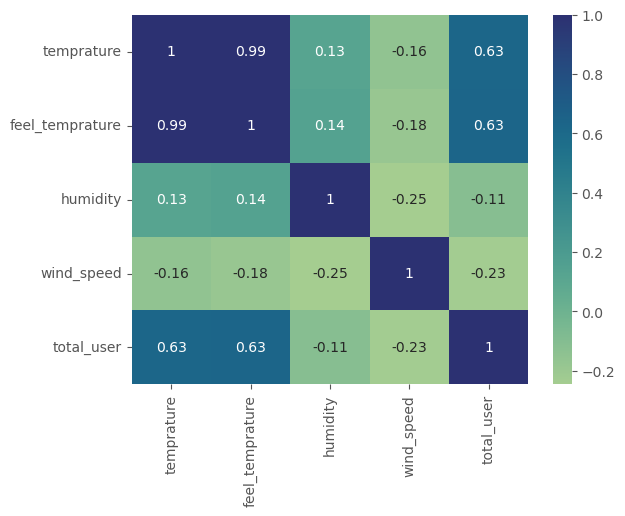

In [79]:
cor = day[['temprature', 'feel_temprature', 'humidity', 'wind_speed','total_user']].corr()
sns.heatmap(data=cor, annot=True, cmap="crest")

Berikut merupakan **korelasi** temprature, feel_temprature, humidity, wind_speed terhadap total user, didapatkan bahwa korelasi `humidity` dan `wind_speed` kepada `total_user` merupakan **negatif** sehingga tidak memiliki korelasi yang kuat. 

`Temprature` dan `feel_temprature` memiliki nilai korelasi **positif** terhadap `total_user` sehingga kedua column tersebut mempengaruhi jumlah user.

In [80]:
day.holiday.value_counts()

no     710
yes     21
Name: holiday, dtype: int64

Semalam 731 hari didapatkan 21 hari libur dan 710 hari kerja

In [81]:
day.groupby(by=['year','month']).agg({
    'month': 'count'
})

month
year month       
2011 Apr       30
     Aug       31
     Dec       31
     Feb       28
     Jan       31
     Jul       31
     Jun       30
     Mar       31
     May       31
     Nov       30
     Oct       31
     Sep       30
2012 Apr       30
     Aug       31
     Dec       31
     Feb       29
     Jan       31
     Jul       31
     Jun       30
     Mar       31
     May       31
     Nov       30
     Oct       31
     Sep       30

Persebaran jumlah bulannya cukup merata untuk tahun 2011 dan 2012

In [82]:
day.season.value_counts()

fall        188
summer      184
springer    181
winter      178
Name: season, dtype: int64

Didapatkan 4 musim dengan persebaran setiap musimnya tidak berbeda jauh, dengan fall sebagai musim terbanyak dan winter merupakan musim dengan jumlah terendah

In [83]:
day.weather_sit.value_counts()

clear         463
mist          247
light rain     21
Name: weather_sit, dtype: int64

Persebaran datanya kebanyakan didominasi oleh clear sedangkan light rain hanya terjadi sebanyak 21 kali

### Explore Hour

In [84]:
hour.sample(5)

,date,season,year,month,hour,holiday,week_day,working_day,weather_sit,temprature,feel_temprature,humidity,wind_speed,casual_user,registered_user,total_user
7413,2011-11-10,winter,2011,Nov,12,no,friday,yes,mist,17.22,21.21,67.0,24.00,18,149,167
5605,2011-08-26,fall,2011,Aug,11,no,saturday,yes,mist,31.16,35.60,62.0,12.73,63,151,214
13207,2012-07-09,fall,2012,Jul,12,no,tuesday,yes,mist,30.34,34.09,58.0,9.00,61,205,266
3568,2011-06-02,summer,2011,Jun,14,no,friday,yes,clear,31.98,33.34,24.0,22.00,43,142,185
8033,2011-12-06,winter,2011,Dec,9,no,wednesday,yes,mist,18.86,22.72,94.0,15.00,4,200,204


In [85]:
hour.describe()

,year,hour,temprature,feel_temprature,humidity,wind_speed,casual_user,registered_user,total_user
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2011.502561,11.546752,20.376474,23.791274,62.802635,14.333069,35.676218,153.786869,189.463088
std,0.500008,6.914405,7.894801,8.588798,19.163309,6.655089,49.305030,151.357286,181.387599
min,2011.000000,0.000000,0.820000,0.760000,8.000000,6.000000,0.000000,0.000000,1.000000
25%,2011.000000,6.000000,13.940000,16.660000,48.000000,9.000000,4.000000,34.000000,40.000000
50%,2012.000000,12.000000,20.500000,24.240000,63.000000,13.000000,17.000000,115.000000,142.000000
75%,2012.000000,18.000000,27.060000,31.060000,78.000000,17.000000,48.000000,220.000000,281.000000
max,2012.000000,23.000000,41.000000,50.000000,100.000000,57.000000,367.000000,886.000000,977.000000


Pada dataset hour didapatkan data dengan jumlah 17379 yang artinya data tersebut diperoleh selama 1739 jam. Didapatkan bahwa rata-rata user menggunakan bike sharing pada jam 12 kurang (tertera pada rata-rata hour 11,54). Diketahui rata-ratanya sebanyak 181,38 total user menggunakan bike sharing system perjamnya. 

In [86]:
hour.weather_sit.value_counts()

clear         11413
mist           4544
light rain     1419
heavy rain        3
Name: weather_sit, dtype: int64

Disimpulkan bahwa `weather_sit` didominasi oleh clear sedangkan heavy rain dengan jumlah paling sedikit

In [87]:
work_vs_day = hour.groupby(by=['hour']).agg({
    'casual_user': 'sum',
    'registered_user': 'sum',
    'total_user': 'sum'
}).sort_values(by='hour', ascending=True).reset_index()

work_vs_day

,hour,casual_user,registered_user,total_user
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428
5,5,1012,13249,14261
6,6,3017,52115,55132
7,7,8037,146134,154171
8,8,15761,245240,261001
9,9,22458,136980,159438


Berikut merupakan rata-rata user pada tiap jamnya

In [88]:
hour.season.value_counts()

fall        4496
summer      4409
springer    4242
winter      4232
Name: season, dtype: int64

<Axes: >

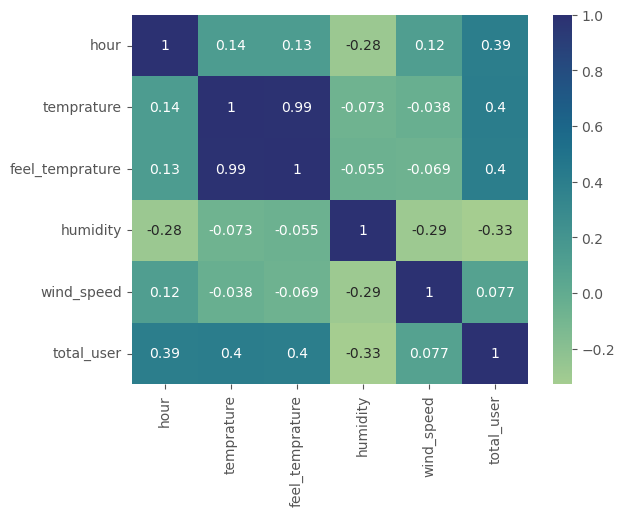

In [89]:
corr = hour[['hour', 'temprature', 'feel_temprature', 'humidity', 'wind_speed', 'total_user']].corr()
sns.heatmap(data=corr, annot=True, cmap='crest')

Diketahui bahwa korelasi `total_user` dengan `column hour, temprature, dan feel_temparature` mendapatkan value **positif**, sehingga memiliki korelasi yang kuat. 

Column `wind_speed` walaupun positif nilainya cukup kecil, terdapat juga column `humidity` yang bervalue **negatif** terhadap `total_user` sehingga column `wind_speed` dan `humidity` **tidak memiliki korelasi** karena nilainya mendekati nol.

## Visualization & Explanatory Analysis

### 1. Apakah kondisi musim dan cuaca mempengaruhi jumlah user?

In [90]:
user_v_season = round(day.groupby(by=['season']).agg({
    'temprature': 'mean',
    'feel_temprature': 'mean',
    'total_user': 'sum'
}), 2).reset_index().sort_values(by='total_user', ascending=False)

user_v_season

,season,temprature,feel_temprature,total_user
0,fall,28.96,32.79,1061129
2,summer,22.32,26.02,918589
3,winter,17.34,20.78,841613
1,springer,12.21,14.85,471348


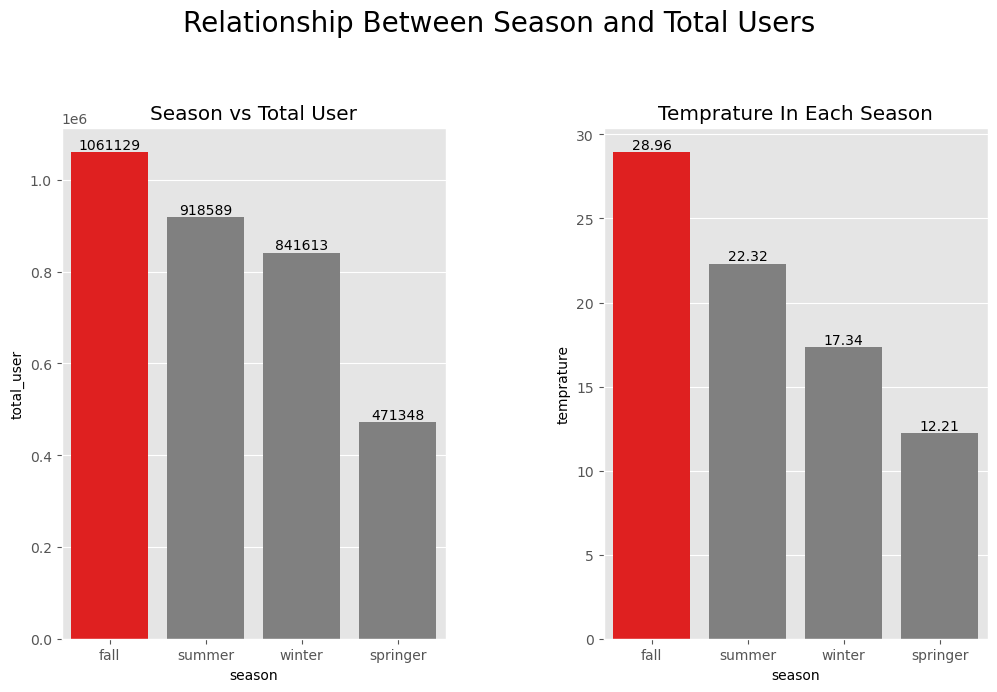

In [91]:
plt.figure(figsize=(12,8))
plot_number = 0
colors = ['red', 'grey', 'grey', 'grey']
title = ['Season vs Total User', 'Temprature In Each Season']
level = ['total_user', 'temprature']
fmt = ['%d', '%g']

for n in range(2):
    plt.subplot(1,2, 1+plot_number)
    plt.title(title[plot_number])
    graph = sns.barplot(data=user_v_season, x='season', y=level[plot_number], palette=colors)
    
    plt.tight_layout(pad=8.0)

    for i in graph.containers:
        graph.bar_label(i, color='black', fmt = fmt[plot_number])
    
    plot_number += 1

plt.suptitle('Relationship Between Season and Total Users', fontsize=20)
plt.show()

**Conclusion**


Bahwa ketika temprature semakin tinggi maka jumlah user pun meningkat, terlihat pada musim fall yang merupakan musim dengan total user terbanyak, berbanding terbalik dengan springer karena suhunya paling rendah.

In [92]:
weather = round(day.groupby(['weather_sit']).agg({
    'temprature': 'mean',
    'feel_temprature': 'mean',
    'total_user': 'sum'
}), 2).sort_values(by='temprature', ascending=False).reset_index()

weather

,weather_sit,temprature,feel_temprature,total_user
0,clear,20.97,24.43,2257952
1,mist,19.29,22.64,996858
2,light rain,17.77,20.65,37869


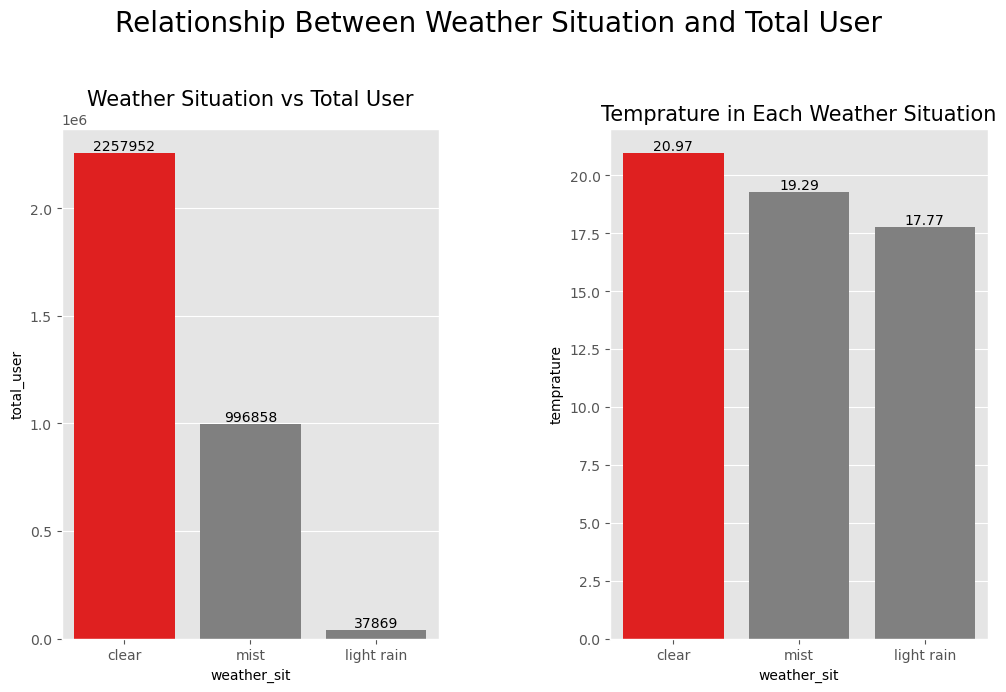

In [93]:
plt.figure(figsize=(12,8))
plot_number = 0
colors = ['red', 'grey', 'grey']
level = ['total_user', 'temprature']
title = ['Weather Situation vs Total User', 'Temprature in Each Weather Situation']
fmt = ['%d', '%g']

for n in range(2):
    plt.subplot(1,2, 1+plot_number)
    
    graph = sns.barplot(data=weather, x='weather_sit', y=level[plot_number], palette = colors)
    plt.title(f'{title[plot_number]}', fontsize=15)
    
    plt.tight_layout(pad=8.0)

    for i in graph.containers:
            graph.bar_label(i, color='black', fmt=fmt[plot_number])
    
    plot_number += 1

plt.suptitle('Relationship Between Weather Situation and Total User', fontsize=20)
plt.show()

**Conclusion**


Bahwa kebanyakan user yang menggunakan bike sharing system ketika cuacanya clear atau cerah, serta clear merupakan cuaca dengan temprature paling tinggi diantara cuaca yang lain

In [94]:
hour_by = hour.groupby(by=['season','hour']).agg({
    'casual_user': 'sum',
    'registered_user': 'sum',
    'total_user': 'sum',
}).reset_index()

hour_by.sample(5)

,season,hour,casual_user,registered_user,total_user
82,winter,10,7296,25698,32994
52,summer,4,255,863,1118
76,winter,4,224,1055,1279
70,summer,22,5133,21752,26885
42,springer,18,3693,39417,43110


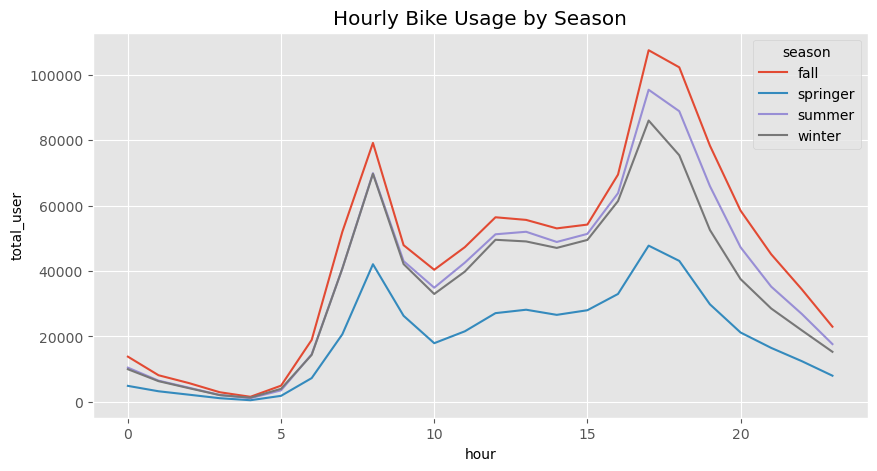

In [95]:
plt.figure(figsize=(10,5))
sns.lineplot(data=hour_by, x='hour', y='total_user', hue='season')
plt.title('Hourly Bike Usage by Season')
plt.show()

**Conclusion**

Berikut merupakan jumlah pengguna berdasarkan sebaran jam per season. Disimpulkan bahwa terjadi lonjakan user yang dimulai pada jam 5 dan jam 15 serta penurunan user terjadi ketika hari menjelang malam dimulai dari jam 18. Pada musim fall dapat dilihat bahwa merupakan musim dengan user yang terbanyak.

------------------


### 2. Apakah hari kerja meningkatkan jumlah user?

In [96]:
work_day = day.groupby(by=['working_day']).agg({
    'casual_user': 'sum',
    'registered_user': 'sum',
    'total_user': 'sum'
}).sort_values(by='registered_user', ascending=False).reset_index()

work_day

,working_day,casual_user,registered_user,total_user
0,yes,303285,1989125,2292410
1,no,316732,683537,1000269


**Conclusion**


Perbedaan yang terlihat pada tabel diatas adalah jumlah user yang telah meregistrasi lebih banyak saat hari kerja, disimpulkan user tersebut sering menggunakan sepeda saat kerja. 

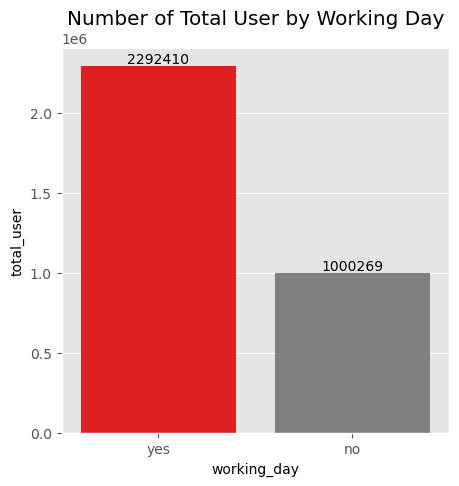

In [97]:
plt.figure(figsize=(5,5))
graph = sns.barplot(data=work_day, x='working_day', y='total_user', palette=['red', 'gray'])
plt.title('Number of Total User by Working Day')

for i in graph.containers:
    graph.bar_label(i, color='black', fmt='%d')

plt.show()

**Conclusion**

Pada waktu kerja didapatkan bahwa bike sharing system banyak digunakan oleh user hingga mendapatkan perbedaan 2x lipat. 

In [98]:
work = day[day['working_day'] == 'yes'].groupby(by='week_day').agg({
    'total_user': 'sum'
}).sort_values(by='total_user', ascending=False).reset_index()

work

,week_day,total_user
0,thursday,481475
1,friday,481296
2,tuesday,468096
3,wednesday,465645
4,monday,395898


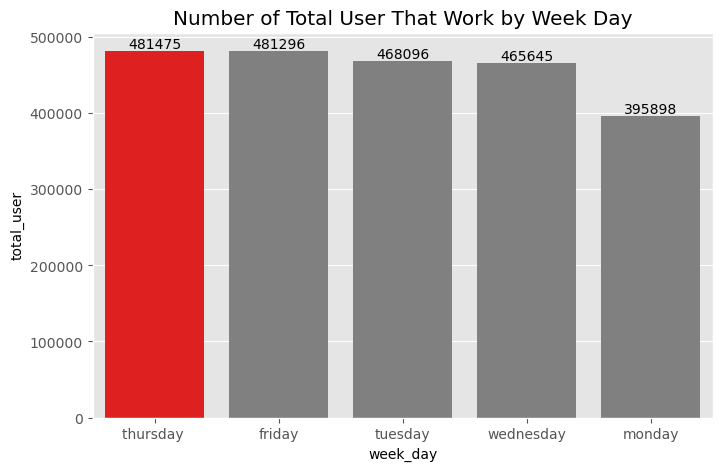

In [99]:
plt.figure(figsize=(8,5))
colors = ['red', 'grey', 'grey', 'grey', 'grey']

plt.title('Number of Total User That Work by Week Day')
graph = sns.barplot(data=work, x='week_day', y='total_user', palette=colors)
for i in graph.containers:
    graph.bar_label(i, color='black', fmt='%d')

**Conclusion**


Berikut sebaran hari dengan jumlah usernya yang bekerja, terlihat persebarannya cukup merata kecuali pada hari senin jumlahnya sedikit berkurang

--------------------------------------------------

### 3. Pada jam berapa user bike sharing system paling sering dan sedikit digunakan?

In [100]:
hour_v_user = hour.groupby(by='hour').agg({
    'total_user': 'sum'
}).reset_index()

hour_v_user.head()

,hour,total_user
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428


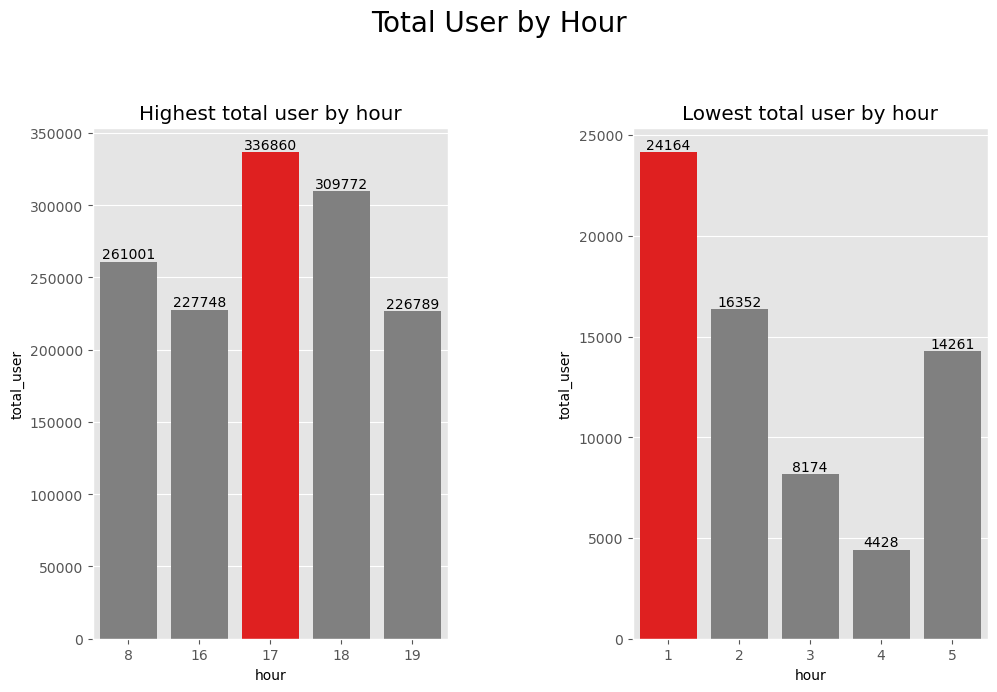

In [101]:
plt.figure(figsize=(12,8))
plot_number = 0
colors0 = ['grey', 'grey', 'red', 'grey', 'grey']
colors1 = ['red', 'grey', 'grey', 'grey', 'grey']

colors = [colors0, colors1]
title = ['Highest total user by hour', 'Lowest total user by hour']
asc = [False, True]

for n in range(2):
    plt.subplot(1,2, 1+plot_number)
    plt.title(title[plot_number])
    bar = sns.barplot(data=hour_v_user.sort_values(by='total_user', ascending=asc[plot_number]).head(),
                        x='hour', y='total_user', palette=colors[plot_number])
    
    plt.tight_layout(pad=8.0)

    for i in bar.containers:
        bar.bar_label(i, color='black')
    
    plot_number += 1

plt.suptitle('Total User by Hour', fontsize=20)
plt.show()

**Conclusion**


Dapat disimpulkan bahwa penggunaan bike sharing system paling banyak berada pada waktu sore yaitu 16,17,18,19 dan pada pagi hari yaitu jam 8, sebaliknya pada dini hari hingga subuh merupakan waktu yang paling sedikit pada penggunaan bike sharing system

In [102]:
from pathlib import Path  

filepath = Path('data/all_hour.csv')  # menyimpan hour dataframe sebagai all_hour
filepath.parent.mkdir(parents=True, exist_ok=True)  
hour.to_csv(filepath)  

filepath = Path('data/all_day.csv')  # menyimpan day dataframe sebagai all_day
filepath.parent.mkdir(parents=True, exist_ok=True)  
day.to_csv(filepath)  